In [4]:
import sys
sys.path.append('/global/homes/c/cpopik/')
sys.path.append('/global/homes/c/cpopik/Capybara')
from Basics import *

setplot(dark=True)

# Basic Test

In [2]:
cpars = {"hh": 0.7, "Omega_L":0.7, "Omega_m":0.3, "Omega_b": 0.044, "XH": 0.76, "T_CMB":2.725}

In [ ]:
import Models.SMFs as SMFs
importlib.reload(SMFs)


cmass = SMFs.BOSSDR10({'galaxy':'CMASS','group':'portsmouth', 'template':'passive', 'IMF':'Kroupa'})
desi1p = SMFs.DESI1Percent({'sample':'LRG'})

desiXcorr = SMFs.DESILRGsCrossCorr({'pzbin':'all', 'hemisphere':'combined','sample':'main'})

In [ ]:
cmass = SMFs.BOSSDR10({'galaxy':'CMASS','group':'portsmouth', 'template':'passive', 'IMF':'Kroupa'})


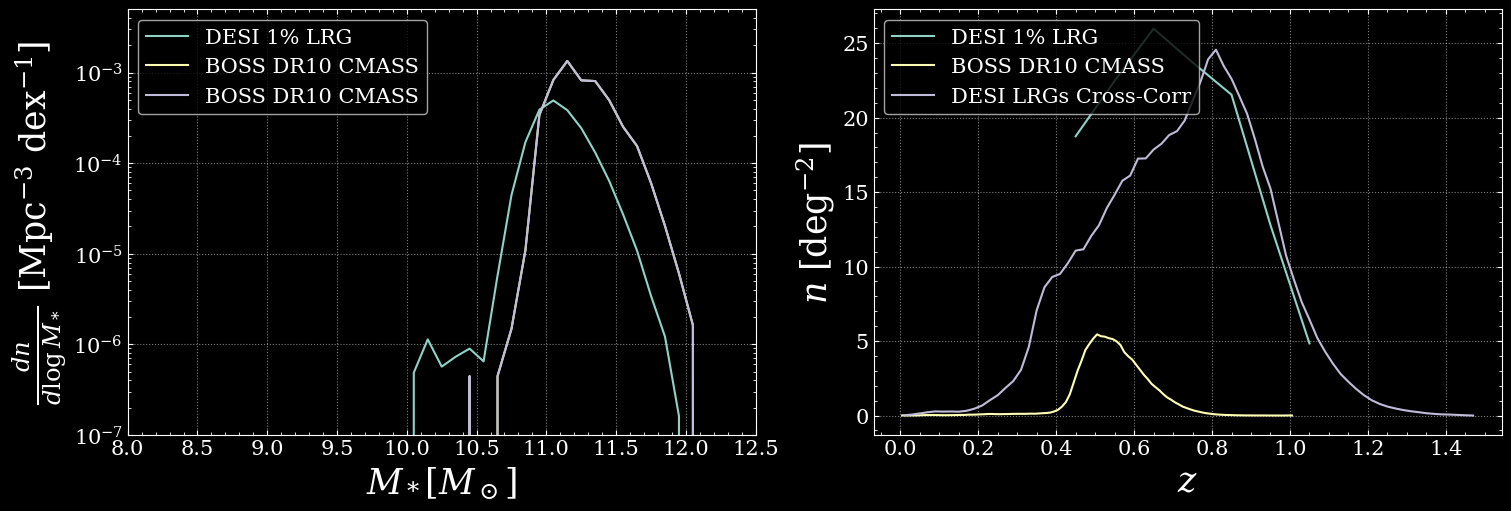

In [31]:
import Models.SMFs as SMFs
importlib.reload(SMFs)

fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')


# cmass_smf = np.average(cmass.dndlogmstar(**cpars), weights=cmass.N_z(**cpars), axis=0)
desi1p_smf = desi1p.dndlogmstar(**cpars)[4]
desi1p_zdist = np.sum(desi1p.N(**cpars), axis=1)/desi1p.info['area']
axs[0].plot(desi1p.logmstar, desi1p_smf, label=f'DESI 1% LRG')
axs[1].plot(desi1p.z, desi1p_zdist, label=f'DESI 1% LRG')

cmass_smf = cmass.dndlogmstar(**cpars)[50]
cmass_zdist = np.sum(cmass.N(**cpars), axis=1)/cmass.info['area']
axs[0].plot(cmass.logmstar, cmass_smf, label=f'BOSS DR10 CMASS')
axs[1].plot(cmass.z, cmass_zdist, label='BOSS DR10 CMASS')


desiXcorr_zdist = np.sum(desiXcorr.N(**cpars), axis=1)/desiXcorr.info['area']
axs[0].plot(cmass.logmstar, cmass_smf, label=f'BOSS DR10 CMASS')
axs[1].plot(desiXcorr.z, desiXcorr_zdist, label=f'DESI LRGs Cross-Corr')

axs[0].set(xlabel=r'$M_* [M_\odot]$', ylabel=r'$\frac{dn}{d\log M_*}$ [Mpc$^{-3}$ dex$^{-1}$]', yscale='log', xlim=(8, 12.5), ylim=(1e-7, 5e-3)); axs[0].legend()
axs[1].set(xlabel=r'$z$', ylabel=r'$n$ [deg$^{-2}$]'); axs[1].legend()
plt.show()

# Combining zdist from DESI Cross-Corr LRGs with SMF from DESI 1%

In [ ]:
    def reweight_on_dist(self, z1, z1bins, N1, z2, z2bins, N2):  # If you want to reweight N1 by some array N2
        # Determine which array is the finer one
        if z1[1]-z1[0]<=z2[1]-z2[0]:  zf, zfbins, Nf, zc, zcbins, Nc = z1, z1bins, N1, z2, z2bins, N2
        else: zf, zfbins, Nf, zc, zcbins, Nc = z2, z2bins, N2, z1, z1bins, N1

        # Bin the finer array by the coarse bins, where it falls into the bins
        binidxs = np.digitize(zf, zcbins)-1
        binvalid = (zf>=zcbins[0]) & (zf<=zcbins[-1])
        zcbinvalid = (zc>=zfbins[0]) & (zc<=zfbins[-1])

        # Recreate the finer disutribution following the coarse bins
        Nfc = np.bincount(binidxs[binvalid], weights=Nf[binvalid], minlength=zc.size)

        # Return scaling factor for the requested distribution
        if N1 is Nc: 
            return np.where(Nc==0, 0, Nfc/Nc) * np.sum(Nc[zcbinvalid])/np.sum(Nfc)
        elif N1 is Nf: 
            noinf = np.zeros(Nf.shape)
            noinf[binvalid] = np.where(Nfc[binidxs[binvalid]]!=0, (Nc/Nfc)[binidxs[binvalid]], 0)
            return noinf * np.sum(Nf[binvalid])/np.sum(Nc)
            # return np.where(binvalid, np.where(Nfc[binidxs]!=0, (Nc/Nfc)[binidxs], 0), 0)

In [135]:
zdistfile="/global/homes/c/cpopik/Data/Zhou2023B/extended_lrg_pz_dndz_iron_v0.4_dz_0.02.txt"
pd.read_csv(zdistfile, sep=" ", usecols=range(1, 17))

,zmin,zmax,all_combined,bin_1_combined,bin_2_combined,bin_3_combined,bin_4_combined,all_north,bin_1_north,bin_2_north,bin_3_north,bin_4_north,all_south,bin_1_south,bin_2_south,bin_3_south
0,0.02,0.055,0.000,0.000,0.000,0.000,0.177,0.000,0.000,0.000,0.000,0.000,0.0,0.00,0.000,0.000
1,0.04,0.055,0.000,0.000,0.000,0.000,0.175,0.000,0.000,0.000,0.000,0.000,0.0,0.00,0.000,0.000
2,0.06,0.202,0.000,0.000,0.055,0.000,0.352,0.000,0.000,0.175,0.000,0.134,0.0,0.00,0.000,0.000
3,0.08,0.863,0.107,0.058,0.000,0.000,1.580,0.343,0.186,0.000,0.000,0.537,0.0,0.00,0.000,0.000
4,0.10,2.277,0.054,0.209,0.152,0.093,2.280,0.174,0.362,0.178,0.000,2.275,0.0,0.14,0.140,0.136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1.40,0.554,0.000,0.059,0.000,0.111,0.883,0.000,0.188,0.000,0.356,0.404,0.0,0.00,0.000,0.000
70,1.42,0.739,0.000,0.000,0.099,0.000,0.884,0.000,0.000,0.000,0.000,0.673,0.0,0.00,0.143,0.000
71,1.44,0.338,0.000,0.000,0.000,0.026,0.705,0.000,0.000,0.000,0.000,0.172,0.0,0.00,0.000,0.038
72,1.46,0.185,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.269,0.0,0.00,0.000,0.000


In [132]:
pd.read_csv(zdistfile, sep=" ", usecols=range(1, 17))

,zmin,zmax,all_combined,bin_1_combined,bin_2_combined,bin_3_combined,bin_4_combined,all_north,bin_1_north,bin_2_north,bin_3_north,bin_4_north,all_south,bin_1_south,bin_2_south,bin_3_south
0,0.01,0.008,0.001,0.001,0.001,0.001,0.009,0.000,0.002,0.002,0.001,0.007,0.001,0.001,0.001,0.001
1,0.02,0.008,0.001,0.001,0.001,0.001,0.005,0.000,0.002,0.000,0.000,0.010,0.001,0.000,0.002,0.002
2,0.03,0.023,0.002,0.001,0.002,0.004,0.018,0.000,0.000,0.002,0.007,0.025,0.003,0.002,0.002,0.002
3,0.04,0.042,0.005,0.005,0.004,0.004,0.039,0.006,0.006,0.006,0.005,0.043,0.004,0.004,0.003,0.004
4,0.05,0.054,0.005,0.006,0.003,0.002,0.036,0.003,0.005,0.002,0.002,0.062,0.006,0.006,0.003,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,1.45,0.019,0.000,0.001,0.002,0.001,0.017,0.000,0.002,0.002,0.000,0.019,0.001,0.000,0.002,0.002
145,1.46,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
146,1.47,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
147,1.48,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [142]:
'Bruzual-Charlot' if pop=='bc03' else pop=='Maraston' 'm11'

NameError: name 'pop' is not defined

In [145]:
pd.read_csv("/global/homes/c/cpopik/Data/Zhou2023B/main_lrg_pz_dndz_decals_des_iron_v0.4_dz_0.02.txt", sep=" ", header=0)

,#,zmin,zmax,all_decals,bin_1_decals,bin_2_decals,bin_3_decals,bin_4_decals,all_des,bin_1_des,bin_2_des,bin_3_des,bin_4_des
0,0.00,0.02,0.018,0.003,0.001,0.003,0.003,0.008,0.000,0.000,0.003,0.002,NaN
1,0.02,0.04,0.070,0.008,0.006,0.006,0.005,0.052,0.000,0.003,0.006,0.014,NaN
2,0.04,0.06,0.154,0.014,0.013,0.007,0.009,0.203,0.017,0.017,0.006,0.014,NaN
3,0.06,0.08,0.231,0.023,0.021,0.014,0.008,0.221,0.021,0.017,0.009,0.003,NaN
4,0.08,0.10,0.294,0.033,0.026,0.021,0.019,0.289,0.021,0.023,0.021,0.015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1.38,1.40,0.086,0.001,0.003,0.004,0.010,0.064,0.000,0.000,0.003,0.005,NaN
70,1.40,1.42,0.066,0.001,0.002,0.002,0.007,0.038,0.000,0.000,0.000,0.000,NaN
71,1.42,1.44,0.042,0.000,0.001,0.003,0.006,0.067,0.006,0.003,0.000,0.012,NaN
72,1.44,1.46,0.019,0.001,0.000,0.001,0.002,0.021,0.000,0.000,0.003,0.000,NaN


In [144]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols: 'list[HashableT] | Callable[[Hashable], bool] | None' = None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters: 'Mapping[Hashable, Callable] | None' = None, true_values: 'list | None' = None, false_values: 'list | None' = None, skipinitialspace: 'bool' = False, skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values: 'Sequence[str] | Mapping[str, Sequence[str]] | None' = None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbos

In [117]:
pd.read_csv(zdistfile, sep=" ").columns

Index(['#', 'zmin', 'zmax', 'all_combined', 'bin_1_combined', 'bin_2_combined',
       'bin_3_combined', 'bin_4_combined', 'all_north', 'bin_1_north',
       'bin_2_north', 'bin_3_north', 'bin_4_north', 'all_south', 'bin_1_south',
       'bin_2_south', 'bin_3_south', 'bin_4_south'],
      dtype='object')

In [ ]:
usecols=lambda c: c != '#'

In [ ]:
import Models.SMFs as SMFs
del sys.modules['Models.SMFs']
import Models.SMFs as SMFs

In [3]:
desi1p = SMFs.DESI1Percent({'sample':'LRG'})
cmass = SMFs.BOSSDR10({'galaxy':'CMASS','group':'portsmouth', 'template':'passive', 'IMF':'Kroupa'})

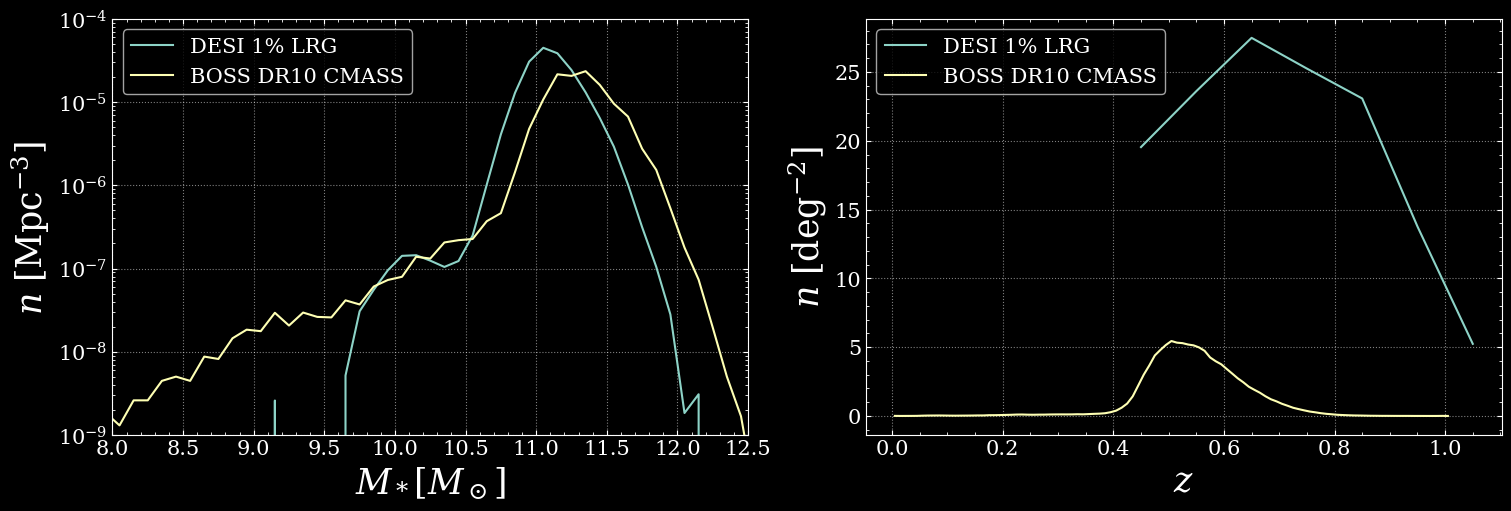

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')
axs[0].set(xlabel=r'$M_* [M_\odot]$', ylabel=r'$n$ [Mpc$^{-3}$]', yscale='log', xlim=(8, 12.5), ylim=(1e-9, 1e-4))
axs[1].set(xlabel=r'$z$', ylabel=r'$n$ [deg$^{-2}$]')


axs[0].plot(desi1p.logmstar, np.average(desi1p.dndlogmstar(**cpars)*desi1p.dlogmstar, weights=desi1p.volumes(**cpars), axis=0), label='DESI 1% LRG')

axs[0].plot(cmass.logmstar, np.average(cmass.dndlogmstar(**cpars)*cmass.dlogmstar, weights=cmass.volumes(**cpars), axis=0), label='BOSS DR10 CMASS')

axs[1].plot(desi1p.z, np.trapz(desi1p.N(**cpars)/desi1p.dlogmstar, desi1p.logmstar)/desi1p.area, label='DESI 1% LRG')
axs[1].plot(cmass.z, np.trapz(cmass.N(**cpars)/cmass.dlogmstar, cmass.logmstar)/cmass.area, label='BOSS DR10 CMASS')

axs[0].legend(), axs[1].legend(); plt.show()

In [62]:
interp1 = scipy.interpolate.RegularGridInterpolator((desi1p.z, desi1p.logmstar), desi1p.dndlogmstar(**cpars))
interp2 = scipy.interpolate.RegularGridInterpolator((desi1p.z, desi1p.logmstar), desi1p.N(**cpars))



valid = (cmass.z<=desi1p.z[-1]) & (cmass.z>=desi1p.z[0])
Z, LOGM = np.meshgrid(cmass.z[valid], desi1p.logmstar, indexing='xy')

new_smf = interp1(np.stack([Z, LOGM], axis=-1)).T
new_N = interp2(np.stack([Z, LOGM], axis=-1)).T

new_smf2 = new_smf*((np.trapz(cmass.N(**cpars)/cmass.dlogmstar, cmass.logmstar))[valid]/(np.trapz(new_N/desi1p.dlogmstar, desi1p.logmstar)))[:, None]
new_N2 = new_N*((np.trapz(cmass.N(**cpars)/cmass.dlogmstar, cmass.logmstar))[valid]/(np.trapz(new_N/desi1p.dlogmstar, desi1p.logmstar)))[:, None]

In [63]:
interp1 = scipy.interpolate.RegularGridInterpolator((desi1p.z, desi1p.logmstar), desi1p.dndlogmstar(**cpars))
valid = (cmass.z<=desi1p.z[-1]) & (cmass.z>=desi1p.z[0])
Z, LOGM = np.meshgrid(cmass.z[valid], desi1p.logmstar, indexing='xy')
new_smf = interp1(np.stack([Z, LOGM], axis=-1)).T
new_N = new_smf*cmass.volumes(**cpars)[valid][:, None]*desi1p.dlogmstar
new_smf3 = new_smf*((np.trapz(cmass.N(**cpars)/cmass.dlogmstar, cmass.logmstar))[valid]/(np.trapz(new_N/desi1p.dlogmstar, desi1p.logmstar)))[:, None]
new_N3 = new_smf3*cmass.volumes(**cpars)[valid][:, None]*desi1p.dlogmstar

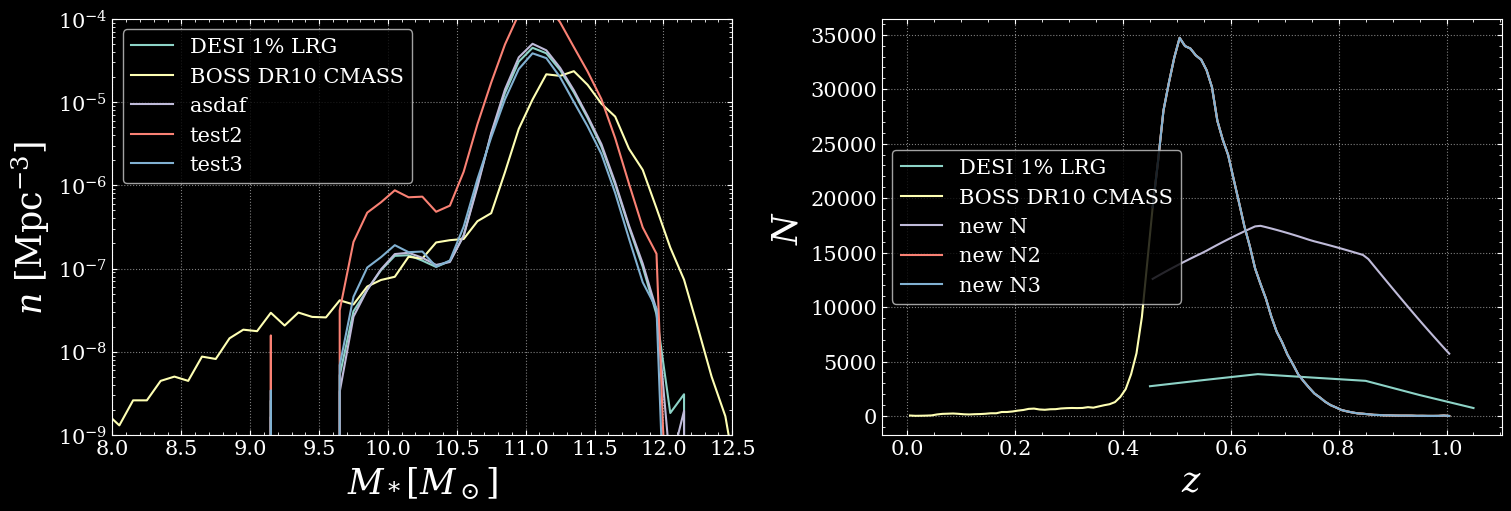

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')
axs[0].set(xlabel=r'$M_* [M_\odot]$', ylabel=r'$n$ [Mpc$^{-3}$]', yscale='log', xlim=(8, 12.5), ylim=(1e-9, 1e-4))
axs[1].set(xlabel=r'$z$', ylabel=r'$N$')


axs[0].plot(desi1p.logmstar, np.average(desi1p.dndlogmstar(**cpars)*desi1p.dlogmstar, weights=desi1p.volumes(**cpars), axis=0), label='DESI 1% LRG')

axs[0].plot(cmass.logmstar, np.average(cmass.dndlogmstar(**cpars)*cmass.dlogmstar, weights=cmass.volumes(**cpars), axis=0), label='BOSS DR10 CMASS')

axs[1].plot(desi1p.z, np.trapz(desi1p.N(**cpars)/desi1p.dlogmstar, desi1p.logmstar), label='DESI 1% LRG')
axs[1].plot(cmass.z, np.trapz(cmass.N(**cpars)/cmass.dlogmstar, cmass.logmstar), label='BOSS DR10 CMASS')


axs[0].plot(desi1p.logmstar, np.average(new_smf*desi1p.dlogmstar, weights=cmass.volumes(**cpars)[valid], axis=0), label='asdaf')
axs[1].plot(cmass.z[valid], np.trapz(new_N/desi1p.dlogmstar, desi1p.logmstar), label='new N')


axs[0].plot(desi1p.logmstar, np.average(new_smf2*desi1p.dlogmstar, weights=cmass.volumes(**cpars)[valid], axis=0), label='test2')

axs[0].plot(desi1p.logmstar, np.average(new_smf3*desi1p.dlogmstar, weights=cmass.volumes(**cpars)[valid], axis=0), label='test3')

axs[1].plot(cmass.z[valid], np.trapz(new_N2/desi1p.dlogmstar, desi1p.logmstar), label='new N2')

axs[1].plot(cmass.z[valid], np.trapz(new_N3/desi1p.dlogmstar, desi1p.logmstar), label='new N3')


axs[0].legend(), axs[1].legend(); plt.show()

In [437]:
import Models.SMFs as SMFs
del sys.modules['Models.SMFs']
import Models.SMFs as SMFs

In [438]:
desilrg.zdfdata

,zmin,zmax,all_combined,bin_1_combined,bin_2_combined,bin_3_combined,bin_4_combined,all_north,bin_1_north,bin_2_north,bin_3_north,bin_4_north,all_south,bin_1_south,bin_2_south,bin_3_south,bin_4_south
0,0.00,0.02,0.016,0.002,0.002,0.002,0.002,0.014,0.000,0.003,0.002,0.001,0.017,0.002,0.001,0.003,0.003
1,0.02,0.04,0.065,0.007,0.006,0.006,0.008,0.057,0.006,0.006,0.008,0.012,0.068,0.007,0.005,0.006,0.006
2,0.04,0.06,0.141,0.012,0.013,0.007,0.010,0.102,0.007,0.013,0.008,0.012,0.159,0.014,0.014,0.007,0.009
3,0.06,0.08,0.220,0.021,0.026,0.014,0.009,0.199,0.016,0.040,0.014,0.011,0.229,0.023,0.020,0.013,0.008
4,0.08,0.10,0.277,0.026,0.030,0.019,0.018,0.245,0.014,0.040,0.016,0.017,0.291,0.032,0.026,0.020,0.019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1.38,1.40,0.077,0.001,0.002,0.003,0.009,0.063,0.000,0.002,0.003,0.009,0.083,0.001,0.002,0.004,0.009
70,1.40,1.42,0.064,0.001,0.001,0.003,0.006,0.066,0.002,0.000,0.006,0.006,0.063,0.001,0.002,0.001,0.006
71,1.42,1.44,0.042,0.001,0.001,0.002,0.005,0.034,0.000,0.000,0.000,0.003,0.045,0.001,0.001,0.002,0.006
72,1.44,1.46,0.019,0.000,0.001,0.002,0.001,0.017,0.000,0.002,0.002,0.000,0.019,0.001,0.000,0.002,0.002


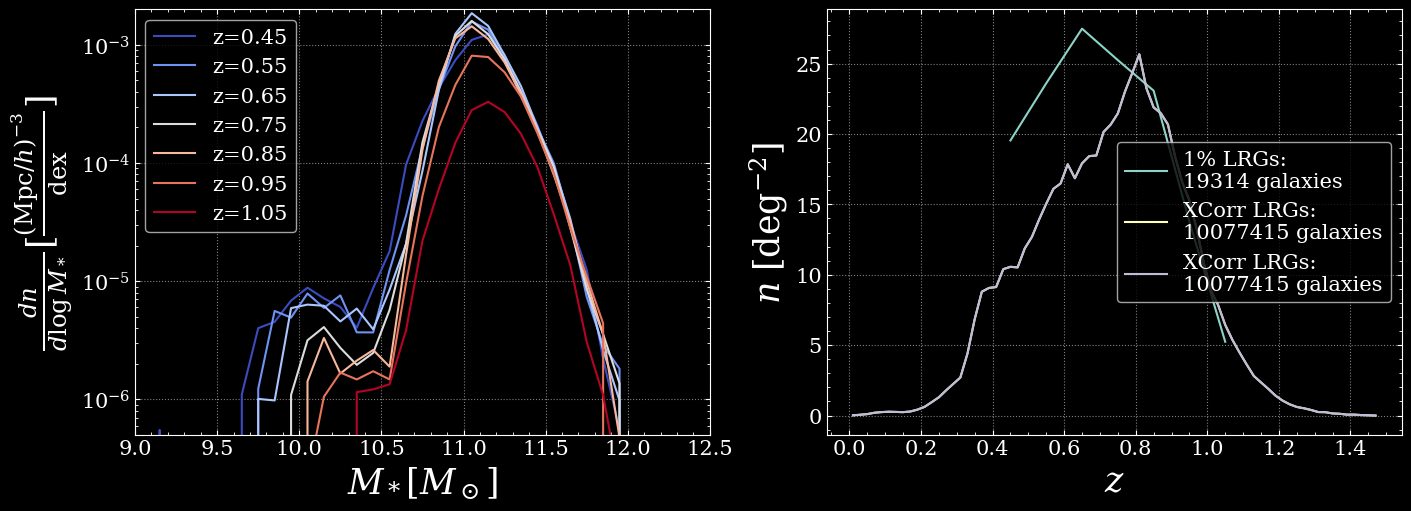

In [475]:
desi1p = SMFs.DESI1Percent({'sample':'LRG'})

desilrg = SMFs.DESILRGsCrossCorr({'pzbin':'2', 'hemisphere':'north','sample':'main'})
desilrg = SMFs.DESILRGsCrossCorr({'pzbin':'all', 'hemisphere':'north','sample':'main'})


fig, axs = plt.subplots(1, 2, figsize=(14, 5), layout='constrained')
axs[0].set(ylabel=r'$\frac{dn}{d \log M_*} [\frac{(\text{Mpc}/h)^{-3}}{\text{dex}}$]', xlabel=r'$M_* [M_\odot]$', yscale='log', xlim=(9, 12.5), ylim=(5e-7, 2e-3))

for i in range(desi1p.z.size):
    axs[0].plot(desi1p.logmstar, desi1p.dndlogmstar_h3[i], label=f'z={desi1p.z[i]:.2f}', c=plt.get_cmap('coolwarm')((i/(desi1p.z.size-1))))
    
axs[1].set(ylabel=r'$n$ [deg$^{-2}$]', xlabel=r'$z$')
desi1p_N_z = np.sum(desi1p.N(**cpars), axis=1)
axs[1].plot(desi1p.z, desi1p_N_z/desi1p.area, label=f"1% LRGs: \n{np.sum(desi1p_N_z):.0f} galaxies")
axs[1].plot(desilrg.z, desilrg.N()/desilrg.area, label=f"XCorr LRGs: \n{np.sum(desilrg.N()):.0f} galaxies")

axs[1].plot(desilrg2.z, desilrg2.N()/desilrg2.area, label=f"XCorr LRGs: \n{np.sum(desilrg2.N()):.0f} galaxies")

axs[0].legend(); axs[1].legend(); plt.show()

In [476]:
def reweight_on_dist(z1, z1bins, N1, z2, z2bins, N2):  # If you want to reweight N1 by some array N2
    # Determine which array is the finer one
    if z1[1]-z1[0]<=z2[1]-z2[0]:  zf, zfbins, Nf, zc, zcbins, Nc = z1, z1bins, N1, z2, z2bins, N2
    else: zf, zfbins, Nf, zc, zcbins, Nc = z2, z2bins, N2, z1, z1bins, N1
    
    # Bin the finer array by the coarse bins, where it falls into the bins
    binidxs = np.digitize(zf, zcbins)-1
    binvalid = (zf>=zcbins[0]) & (zf<=zcbins[-1])
    zcbinvalid = (zc>=zfbins[0]) & (zc<=zfbins[-1])

    # Recreate the finer disutribution following the coarse bins
    Nfc = np.bincount(binidxs[binvalid], weights=Nf[binvalid], minlength=zc.size)

    # Return scaling factor for the requested distribution
    if N1 is Nc: 
        return np.where(Nc==0, 0, Nfc/Nc) * np.sum(Nc[zcbinvalid])/np.sum(Nfc)
    elif N1 is Nf: 
        noinf = np.zeros(Nf.shape)
        noinf[binvalid] = np.where(Nfc[binidxs[binvalid]]!=0, (Nc/Nfc)[binidxs[binvalid]], 0)
        return noinf * np.sum(Nf[binvalid])/np.sum(Nc)
        # return np.where(binvalid, np.where(Nfc[binidxs]!=0, (Nc/Nfc)[binidxs], 0), 0)

In [477]:
desi1p_xzdist = reweight_on_dist(desi1p.z, desi1p.zbins, desi1p_N_z, desilrg.z, desilrg.zbins, desilrg.N())
desix_1pzdist = reweight_on_dist(desilrg.z, desilrg.zbins, desilrg.N(), desi1p.z, desi1p.zbins, desi1p_N_z)

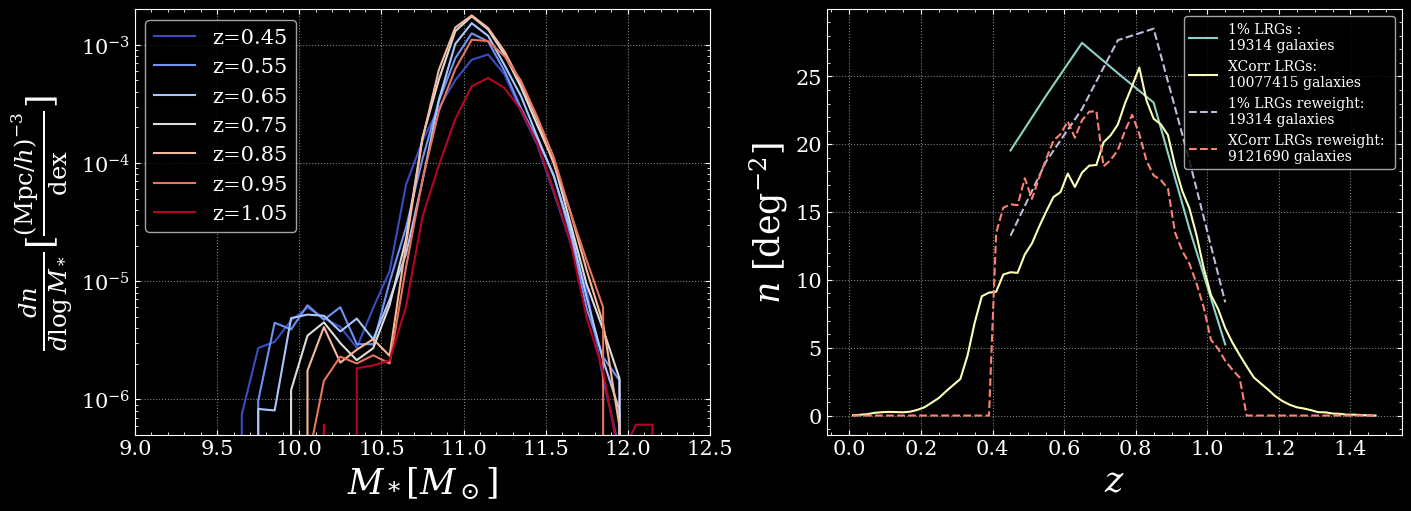

In [482]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5), layout='constrained')
axs[0].set(ylabel=r'$\frac{dn}{d \log M_*} [\frac{(\text{Mpc}/h)^{-3}}{\text{dex}}$]', xlabel=r'$M_* [M_\odot]$', yscale='log', xlim=(9, 12.5), ylim=(5e-7, 2e-3))

for i in range(desi1p.z.size):
    axs[0].plot(desi1p.logmstar, desi1p_xzdist[i, None]*desi1p.dndlogmstar_h3[i], label=f'z={desi1p.z[i]:.2f}', c=plt.get_cmap('coolwarm')((i/(desi1p.z.size-1))))

axs[1].set(ylabel=r'$n$ [deg$^{-2}$]', xlabel=r'$z$')
desi1p_N_z = np.sum(desi1p.N(**cpars), axis=1)
axs[1].plot(desi1p.z, desi1p_N_z/desi1p.area, label=f"1% LRGs : \n{np.sum(desi1p_N_z):.0f} galaxies")

axs[1].plot(desilrg.z, desilrg.N_deg2, label=f"XCorr LRGs: \n{np.sum(desilrg.N()):.0f} galaxies")

axs[1].plot(desi1p.z, desi1p_xzdist*desi1p_N_z/desi1p.area, label=f"1% LRGs reweight: \n{np.sum(desi1p_xzdist*desi1p_N_z):.0f} galaxies", ls='--')

axs[1].plot(desilrg.z, desix_1pzdist*desilrg.N()/desilrg.area, label=f"XCorr LRGs reweight: \n{np.sum(desix_1pzdist*desilrg.N()):.0f} galaxies", ls='--')

axs[0].legend(); axs[1].legend(fontsize=10); plt.show()

In [163]:
np.sum(desi1p.N(**cpars))

18209.579885920575

In [ ]:
np.sum(desi1p.N(**cpars))

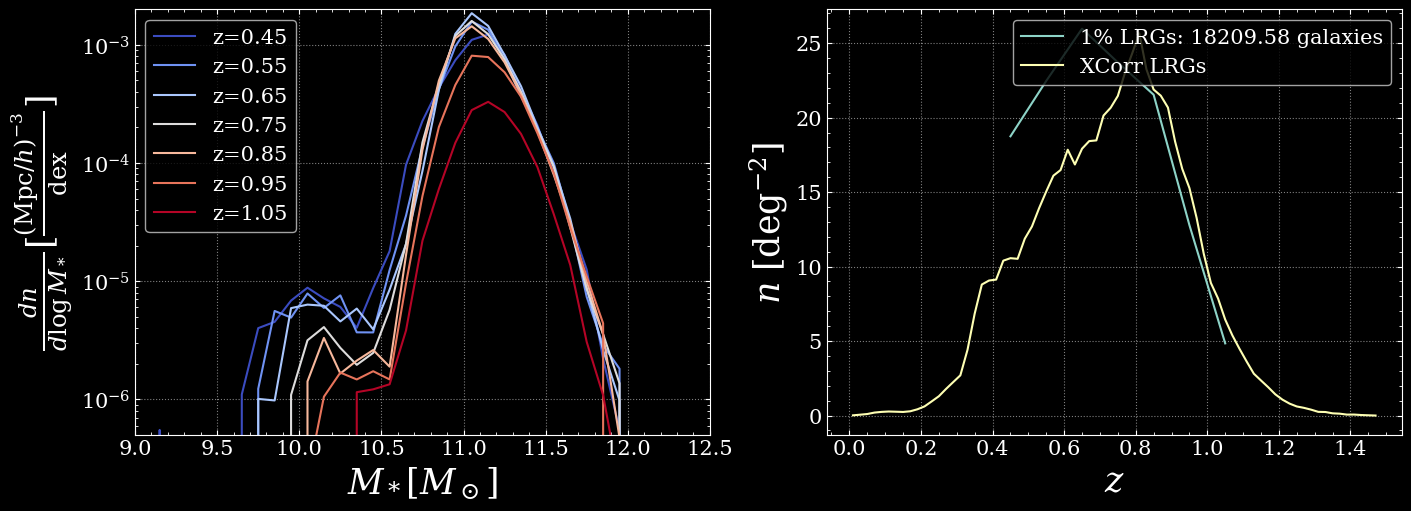

In [161]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5), layout='constrained')
axs[0].set(ylabel=r'$\frac{dn}{d \log M_*} [\frac{(\text{Mpc}/h)^{-3}}{\text{dex}}$]', xlabel=r'$M_* [M_\odot]$', yscale='log', xlim=(9, 12.5), ylim=(5e-7, 2e-3))

for i in range(desi1p.z.size):
    axs[0].plot(desi1p.logmstar, desi1p.dndlogmstar_h3[i], label=f'z={desi1p.z[i]:.2f}', c=plt.get_cmap('coolwarm')((i/(desi1p.z.size-1))))
    
axs[1].set(ylabel=r'$n$ [deg$^{-2}$]', xlabel=r'$z$')
desi1p_N_z = np.trapz(desi1p.N(**cpars)/desi1p.dlogmstar, desi1p.logmstar)
axs[1].plot(desi1p.z, desi1p_N_z/desi1p.area, label=f"1% LRGs: {np.sum(desi1p_N_z):.2f} galaxies")
axs[1].plot(desilrg.z, desilrg.N_deg2, label='XCorr LRGs')

axs[0].legend(); axs[1].legend(); plt.show()

In [129]:
desi1p.z is desilrg.z

False

In [28]:
desi1p = SMFs.DESI1Percent({'sample':'LRG'})

In [ ]:

    # def matchdist(self, olddistx,olddisty, newdistx,newdisty):
    #     dx = (self.olddistx[1]-self.olddistx[0])
    #     pd.cut(newdistx, bins=np.arange(self.olddistx[0]-dx/2, self.olddistx[:-1]+dx, dx))
        
    #     self.zdistscale = self.zdistdf.groupby('zbin')[f"{self.zbin}_{self.hemisphere}"].sum().values*self.surveyarea
        
            

    
    
        # def gdist(self, **cosmopars):
    #     gdist = self.SMFraw*cosmopars["hh"]**3*self.SMF_to_N(**cosmopars)[:, None]
    #     if self.zweight=='True':
    #         self.LRGXcorrzdist()
    #         gdist = gdist*(self.zdistscale/np.sum(gdist, axis=1))[:, None]
    #     return gdist

    # def SMF(self, **cosmopars):
    #     SMF = self.SMFraw*cosmopars['hh']**3
    #     if self.zweight=='True':
    #         self.LRGXcorrzdist()
    #         SMF = SMF*(self.zdistscale/self.SMF_to_N(**cosmopars)/np.trapz(SMF, np.log10(self.mstars), axis=1))[:, None]
    #     return SMF
    
    # def LRGXcorrzdist(self):
    #     # Read in the redshift distribution for each specific bin
    #     # Number density in N / deg^2, dataframe with 1D arrays of length [ndim_zs_zdist]
    #     self.zdistdf = pd.read_csv(self.redshift_dist_file, sep=" ", skiprows=1, names=pd.read_csv(self.redshift_dist_file, sep=" ").columns[1:])
    #     self.zdist = self.zdistdf[f"{self.zbin}_{self.hemisphere}"]

    #     # Sort/group/sum up the finer redshift bins to match the bins of the SMF distribution
    #     self.zdistdf['zbin'] = pd.cut(self.zdistdf['zmin'], bins=np.arange(self.zs[0], self.zs[-1]+0.2, 0.1))
    #     self.zdistscale = self.zdistdf.groupby('zbin')[f"{self.zbin}_{self.hemisphere}"].sum().values*self.surveyarea
    

    
    
    
    # redshift_dist_file = "/global/cfs/projectdirs/desi/public/papers/c3/lrg_xcorr_2023/v1/redshift_dist/main_lrg_pz_dndz_iron_v0.4_dz_0.01.txt"  # arxiv.org/abs/2309.06443

In [2]:
ViewDataOrganization("/global/cfs/projectdirs/desi/public/papers/c3/lrg_xcorr_2023/v1/redshift_dist/")

The .txt files contain the redshift distributions of the Main and Extended samples in z spacing of 0.02 (and 0.01 spacing for the Main LRGs) as shown in Figures 2 and 3 in the paper.

In each file, the "all_*" columns correspond to the full sample without tomographic binning. The "*_combined" columns correspond to the weighted average of the North+South combined sample.

In main_lrg_pz_dndz_decals_des_iron_v0.4_dz_0.02.txt, the South sample is separated into DECaLS and DES, corresponding to Figure 12 in the paper.




/global/cfs/projectdirs/desi/public/papers/c3/lrg_xcorr_2023/v1/redshift_dist//
     README.txt
     main_lrg_pz_dndz_decals_des_iron_v0.4_dz_0.02.txt
     main_lrg_pz_dndz_iron_v0.4_dz_0.01.txt
     extended_lrg_pz_dndz_iron_v0.4_dz_0.02.txt
     main_lrg_pz_dndz_iron_v0.4_dz_0.02.txt


In [8]:
sizeof_fmt(get_folder_size("/global/homes/c/cpopik/Capybara/Data"))

'138.3MB'

In [4]:
def get_folder_size(path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            try:
                total_size += os.path.getsize(fp)
            except FileNotFoundError:
                pass  # In case the file is deleted between os.walk and os.path.getsize
    return total_size

# Example usage
folder_path = "/your/folder/path"
size_bytes = get_folder_size(folder_path)

# Convert to more readable format
def sizeof_fmt(num, suffix="B"):
    for unit in ["", "K", "M", "G", "T", "P"]:
        if abs(num) < 1024.0:
            return f"{num:3.1f}{unit}{suffix}"
        num /= 1024.0
    return f"{num:.1f}Y{suffix}"

print("Total size:", sizeof_fmt(size_bytes))

Total size: 0.0B


In [ ]:
redshift_dist_file="/global/cfs/projectdirs/desi/public/papers/c3/lrg_xcorr_2023/v1/redshift_dist/main_lrg_pz_dndz_iron_v0.4_dz_0.01.txt"
zbin, hemisphere='bin_1', 'combined'
zdistdf = pd.read_csv(redshift_dist_file, sep=" ", skiprows=1, names=pd.read_csv(redshift_dist_file, sep=" ").columns[1:])
zdist = zdistdf[f"{zbin}_{hemisphere}"]

zs=np.linspace(0, 1, 10)
surveyarea=6000
# Sort/group/sum up the finer redshift bins to match the bins of the SMF distribution
zdistdf['zbin'] = pd.cut(zdistdf['zmin'], bins=np.arange(kroupass.z[0], kroupass.z[-1]+0.2, 0.1))
zdistscale = zdistdf.groupby('zbin', observed=False)[f"{zbin}_{hemisphere}"].sum().values*surveyarea

In [ ]:
filename = "/global/cfs/projectdirs/desi/public/ets/vac/stellar_mass/v1/south/sweep-070m025-080m020-stellar-mass.fits.gz"
with fits.open(filename, memmap=True) as hdul:
    data = hdul[1].data  # Usually the table is in extension 1

# Convert to DataFrame
cols = ['STELLAR_MASS']  # replace with your actual column names
df = pd.DataFrame({col: hdul[1].data[col] for col in cols})

In [113]:
import Models.SMFs as SMFs
del sys.modules['Models.SMFs']  # Clear the cache to avoid conflicts
import Models.SMFs as SMFs

In [118]:
cpars = {'hh': 0.7, 'Omega_L': 0.75, 'Omega_m': 0.25, 'Omega_b': 0.044, 'T_CMB': 2.726, 'XH':0.76, 'v_rms':1.06e-3}
SMFs.DESI1Percent({'sample':'LRG'}).N(**cpars)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.82004959e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.64009919e-01, 2.05221431e+00,
        2.31924768e+00, 3.51080332e+00, 4.51207935e+00, 3.66606447e+00,
        3.10205455e+00, 2.06706728e+00, 4.48304943e+00, 9.19537600e+00,
        4.96265251e+01, 1.16424113e+02, 2.22238981e+02, 3.80380671e+02,
        5.65595510e+02, 6.26996415e+02, 4.24059848e+02, 2.07661059e+02,
        1.07113903e+02, 4.22788295e+01, 1.61800073e+01, 6.42308215e+00,
        1.12801984e+00, 2.82004959e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [219]:
desi.z

array([0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05])

In [229]:
finezs[21:28].values

array([0.215, 0.225, 0.235, 0.245, 0.255, 0.265, 0.275])

In [ ]:
finezs = (zdistdf.zmax+zdistdf.zmin)/2
fineN = zdistdf.all_combined.values
coarsezs = desi.z
coarseN = np.sum(desi.N(**cpars), axis=1)
binidxs, binvalid = np.digitize(finezs, coarsezs)-1, (finezs>=coarsezs[0]) & (finezs<=coarsezs[-1])
fineNcoarse = np.bincount(binidxs[binvalid], weights=fineN[binvalid], minlength=coarsezs.size)

Nc_scale = np.where(np.isinf(fineNcoarse/coarseN), 0, fineNcoarse/coarseN)
Nf_scale = np.where(np.isinf((coarseN/fineNcoarse)[binidxs]), 0, (coarseN/fineNcoarse)[binidxs])

/tmp/ipykernel_221256/1566169454.py:9: RuntimeWarning: divide by zero encountered in divide
  Nf_scale = np.where(np.isinf((coarseN/fineNcoarse)[binidxs]), 0, (coarseN/fineNcoarse)[binidxs])


In [326]:
np.sum(fineN*Nf_scale), np.sum(coarseN)

(19224.589310056574, 19993.773052095316)

In [328]:
np.sum(coarseN*Nc_scale), np.sum(fineN)

(504.71600000000007, 600.691)

In [335]:
fineN[binvalid]

array([ 5.584,  5.448,  5.715,  5.896,  6.158,  6.421,  6.361,  6.822,
        7.109,  7.253,  7.565,  7.895,  7.872,  7.939,  8.173,  8.53 ,
        8.72 ,  8.582,  8.681,  8.802,  9.052,  9.158,  9.086,  9.325,
        9.506,  9.536,  9.553,  9.776, 10.036, 10.455, 10.67 , 10.973,
       11.408, 11.653, 12.265, 12.431, 12.133, 11.809, 11.664, 11.488,
       11.123, 10.822, 10.627, 10.409,  9.847,  9.598,  8.969,  8.475,
        8.239,  7.842,  7.397,  6.804,  6.185,  5.611,  5.132,  4.687,
        4.452,  4.037,  3.59 ,  3.367])

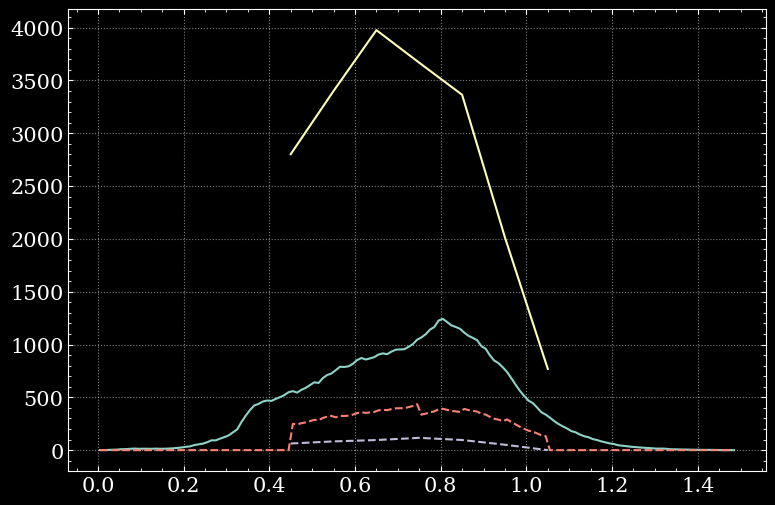

In [324]:
plt.plot(finezs, fineN*100)
plt.plot(coarsezs, coarseN)
plt.plot(coarsezs, np.sum(desi.N(**cpars), axis=1)*Nc_scale, ls='--')
plt.plot(finezs, fineN*Nf_scale, ls='--')

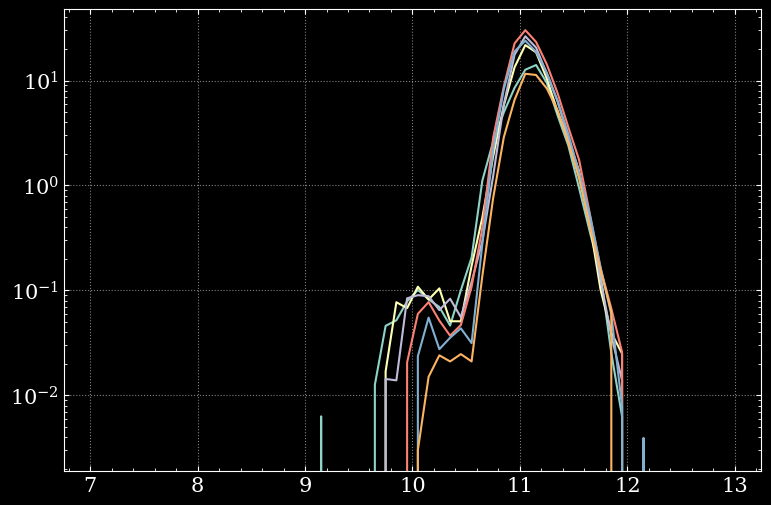

In [265]:
for i in range(coarseNnew.shape[0]):
    plt.plot(desi.logmstar, coarseNnew[i])
plt.yscale('log')

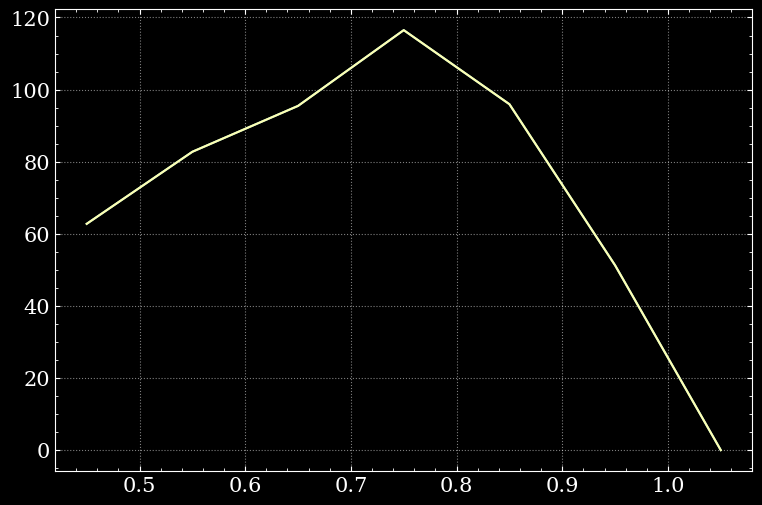

In [180]:
plt.plot(desi.z, newN)
plt.plot(desi.z, np.sum(newNdesi, axis=1))

In [97]:
zs = np.linspace(0, 1, 5)

In [87]:
oldzs

0      0.005
1      0.015
2      0.025
3      0.035
4      0.045
       ...  
144    1.445
145    1.455
146    1.465
147    1.475
148    1.485
Length: 149, dtype: float64

In [68]:
np.arange(kroupass.z[0], kroupass.z[-1]+0.2, 0.1)

array([0.005, 0.105, 0.205, 0.305, 0.405, 0.505, 0.605, 0.705, 0.805,
       0.905, 1.005, 1.105])

In [66]:
pd.cut(zdistdf['zmin'], bins=np.arange(kroupass.z[0], kroupass.z[-1]+0.2, 0.1))

0                 NaN
1      (0.005, 0.105]
2      (0.005, 0.105]
3      (0.005, 0.105]
4      (0.005, 0.105]
            ...      
144               NaN
145               NaN
146               NaN
147               NaN
148               NaN
Name: zmin, Length: 149, dtype: category
Categories (11, interval[float64, right]): [(0.005, 0.105] < (0.105, 0.205] < (0.205, 0.305] < (0.305, 0.405] ... (0.705, 0.805] < (0.805, 0.905] < (0.905, 1.005] < (1.005, 1.105]]

In [63]:
zdistdf.zmax.values[-1:]

array([1.49])

In [64]:
zbins = np.concatenate([zdistdf.zmin.values, zdistdf.zmax.values[-1:]])
N_deg2 = zdistdf[f"{zbin}_{hemisphere}"]

In [ ]:

N_deg2

0      0.001
1      0.001
2      0.002
3      0.005
4      0.005
       ...  
144    0.000
145    0.000
146    0.000
147    0.000
148    0.000
Name: bin_1_combined, Length: 149, dtype: float64

In [39]:
len(os.listdir("/global/cfs/projectdirs/desi/public/ets/vac/stellar_mass/v1/north"))+len(os.listdir("/global/cfs/projectdirs/desi/public/ets/vac/stellar_mass/v1/south"))

740

In [36]:
ViewDataOrganization("/global/cfs/projectdirs/desi/public/ets/vac/stellar_mass/v1/")

### arXiv:2208.08515                  DESI LRG target selection    (Zhou+, 2022)
Target Selection and Validation of DESI Luminous Red Galaxies
    Rongpu Zhou, Biprateep Dey, Jeffrey A. Newman, D. J. Eisenstein, K. Dawson,
    S. Bailey, A. Berti, J. Guy, Ting-Wen Lan, H. Zou, J. Aguilar, S. Ahlen,
    Shadab Alam, D. Brooks, A. de la Macorra, A. Dey, G. Dhungana, K. Fanning,
    A. Font-Ribera, S. Gontcho A Gontcho, K. Honscheid, Mustapha Ishak,
    T. Kisner, A. Kovacs, A. Kremin, M. Landriau, Michael E. Levi,
    C. Magneville, Marc Manera, P. Martini, Aaron M. Meisner, R. Miquel,
    J. Moustakas, Adam D. Myers, Jundan Nie, N. Palanque-Delabrouille,
    W.J. Percival, C. Poppett, F. Prada, A. Raichoor, A. J. Ross, E. Schlafly,
    D. Schlegel, M. Schubnell, Gregory Tarle, B. A. Weaver, R. H. Wechsler,
    Christophe Yèche, Zhimin Zhou

This directory contains the stellar mass catalogs. These catalogs are row-by-row
matched to the sweep catalogs in Legacy Surveys DR9 (https://www.le

In [30]:
zdistdf = pd.read_csv(redshift_dist_file, sep=" ", skiprows=1, names=pd.read_csv(redshift_dist_file, sep=" ").columns[1:])
zdistdf

,zmin,zmax,all_combined,bin_1_combined,bin_2_combined,bin_3_combined,bin_4_combined,all_north,bin_1_north,bin_2_north,bin_3_north,bin_4_north,all_south,bin_1_south,bin_2_south,bin_3_south,bin_4_south
0,0.00,0.01,0.008,0.001,0.001,0.001,0.001,0.009,0.000,0.002,0.002,0.001,0.007,0.001,0.001,0.001,0.001
1,0.01,0.02,0.008,0.001,0.001,0.001,0.001,0.005,0.000,0.002,0.000,0.000,0.010,0.001,0.000,0.002,0.002
2,0.02,0.03,0.023,0.002,0.001,0.002,0.004,0.018,0.000,0.000,0.002,0.007,0.025,0.003,0.002,0.002,0.002
3,0.03,0.04,0.042,0.005,0.005,0.004,0.004,0.039,0.006,0.006,0.006,0.005,0.043,0.004,0.004,0.003,0.004
4,0.04,0.05,0.054,0.005,0.006,0.003,0.002,0.036,0.003,0.005,0.002,0.002,0.062,0.006,0.006,0.003,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,1.44,1.45,0.019,0.000,0.001,0.002,0.001,0.017,0.000,0.002,0.002,0.000,0.019,0.001,0.000,0.002,0.002
145,1.45,1.46,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
146,1.46,1.47,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
147,1.47,1.48,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
def volumes(self, zs, hh, T_CMB, Omega_m, Omega_L, Omega_b, **kwargs):
    cosmo = astropy.cosmology.LambdaCDM(H0=hh*100, Tcmb0=T_CMB, Om0=Omega_m, Ode0=Omega_L, Ob0=Omega_b)

    vols = np.array([(cosmo.comoving_volume(z+self.dz/2).value-cosmo.comoving_volume(z-self.dz/2).value)/(1+z)**3 for z in self.z])

    return vols * (self.area/(4*np.pi*(180/np.pi)**2))

In [26]:
zdistdf.bin_1_combined

0      0.001
1      0.001
2      0.002
3      0.005
4      0.005
       ...  
144    0.000
145    0.000
146    0.000
147    0.000
148    0.000
Name: bin_1_combined, Length: 149, dtype: float64

In [ ]:
zdistdf.groupby('zbin')

AttributeError: 'DataFrame' object has no attribute 'group_by'

In [22]:
zdistdf

,zmin,zmax,all_combined,bin_1_combined,bin_2_combined,bin_3_combined,bin_4_combined,all_north,bin_1_north,bin_2_north,bin_3_north,bin_4_north,all_south,bin_1_south,bin_2_south,bin_3_south,bin_4_south,zbin
0,0.00,0.01,0.008,0.001,0.001,0.001,0.001,0.009,0.000,0.002,0.002,0.001,0.007,0.001,0.001,0.001,0.001,NaN
1,0.01,0.02,0.008,0.001,0.001,0.001,0.001,0.005,0.000,0.002,0.000,0.000,0.010,0.001,0.000,0.002,0.002,"(0.005, 0.105]"
2,0.02,0.03,0.023,0.002,0.001,0.002,0.004,0.018,0.000,0.000,0.002,0.007,0.025,0.003,0.002,0.002,0.002,"(0.005, 0.105]"
3,0.03,0.04,0.042,0.005,0.005,0.004,0.004,0.039,0.006,0.006,0.006,0.005,0.043,0.004,0.004,0.003,0.004,"(0.005, 0.105]"
4,0.04,0.05,0.054,0.005,0.006,0.003,0.002,0.036,0.003,0.005,0.002,0.002,0.062,0.006,0.006,0.003,0.002,"(0.005, 0.105]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,1.44,1.45,0.019,0.000,0.001,0.002,0.001,0.017,0.000,0.002,0.002,0.000,0.019,0.001,0.000,0.002,0.002,NaN
145,1.45,1.46,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
146,1.46,1.47,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
147,1.47,1.48,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN


In [12]:
kroupass.z

array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
       0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
       0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
       0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355,
       0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445,
       0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535,
       0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625,
       0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715,
       0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805,
       0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895,
       0.905, 0.915, 0.925, 0.935, 0.945, 0.955, 0.965, 0.975, 0.985,
       0.995, 1.005])

In [7]:
kroupass = SMFs.BOSSDR10({'group':'portsmouth', 'IMF':'Kroupa', 'template':'passive', 'galaxy':'CMASS'})


In [3]:
import Models.SHMRs as SHMR
import Models.SMFs as SMFs

shmr = SHMR.Kravstov2014({'sample':'Mvir_scatter'})
logmstarmin,logmstarmax = 9.42,11.73

mopc_logmhalos = np.log10(np.genfromtxt("/global/homes/c/cpopik/Capybara/Data/mass_distrib.txt"))
mopc_logmhalo = np.array([[11.31932504, 11.43785913, 11.57526319, 11.74539764, 11.97016907, 12.27689266, 12.67884686, 13.16053855, 13.69871423]]).T
mopc_N = np.array([2.94467222e-06, 2.94467222e-06, 2.94467222e-06, 1.47233611e-05, 3.38637305e-05, 4.13431979e-03, 1.31666601e-01, 3.36540698e-01, 8.13760167e-02])

In [41]:
import Models.SMFs as SMFs
del sys.modules['Models.SMFs']  # Clear the cache to avoid conflicts
import Models.SMFs as SMFs

In [ ]:
kroupass = SMFs.DR10CMASS({'group':'portsmouth', 'IMF':'krou', 'template':'passive'})
salppass = SMFs.DR10CMASS({'group':'portsmouth', 'IMF':'salp', 'template':'passive'})
kroustar = SMFs.DR10CMASS({'group':'portsmouth', 'IMF':'krou', 'template':'starforming'})
salpstar = SMFs.DR10CMASS({'group':'portsmouth', 'IMF':'salp', 'template':'starforming'})

wisc = SMFs.DR10CMASS({'group':'wisconsin', 'pop':'m11'})

In [261]:
Table.read(f"{wisc.path}/{wisc.group}_{wisc.fname}-v5_5_12.fits.gz").columns

<TableColumns names=('PLATE','MJD','FIBERID','RA','DEC','Z','Z_ERR','ZNUM','MSTELLAR_MEDIAN','MSTELLAR_ERR','MSTELLAR_P2P5','MSTELLAR_P16','MSTELLAR_P84','MSTELLAR_P97P5','VDISP_MEDIAN','VDISP_ERR','VDISP_P2P5','VDISP_P16','VDISP_P84','VDISP_P97P5','CALPHA','CALPHA_NORM','SN_MEDIAN','WARNING','LEGACY_TARGET1','LEGACY_TARGET2','SPECIAL_TARGET1','SPECIAL_TARGET2','BOSS_TARGET1','ANCILLARY_TARGET1','ANCILLARY_TARGET2','SPECPRIMARY','SPECOBJID')>

In [267]:
dftestwisc = Table.read(f"{wisc.path}/{wisc.group}_{wisc.fname}-v5_5_12.fits.gz")['Z', wisc.mcolname, 'BOSS_TARGET1', 'SPECPRIMARY'].to_pandas()
dftestmara = Table.read(f"{kroupass.path}/{kroupass.group}_{kroupass.fname}-v5_5_12.fits.gz")['Z', kroupass.mcolname, 'BOSS_TARGET1', 'SPECPRIMARY'].to_pandas()

In [269]:
def decode_bitmask(val):
    """Return a list of bit positions (starting from 0) where bits are 1"""
    return [i for i in range(val.bit_length()) if (val >> i) & 1]

dftestwisc['bits'] = dftestwisc['BOSS_TARGET1'].apply(decode_bitmask)
dftestmara['bits'] = dftestmara['BOSS_TARGET1'].apply(decode_bitmask)


In [ ]:
(shmr.SHMR(dftestmara.LOGMASS)>12)

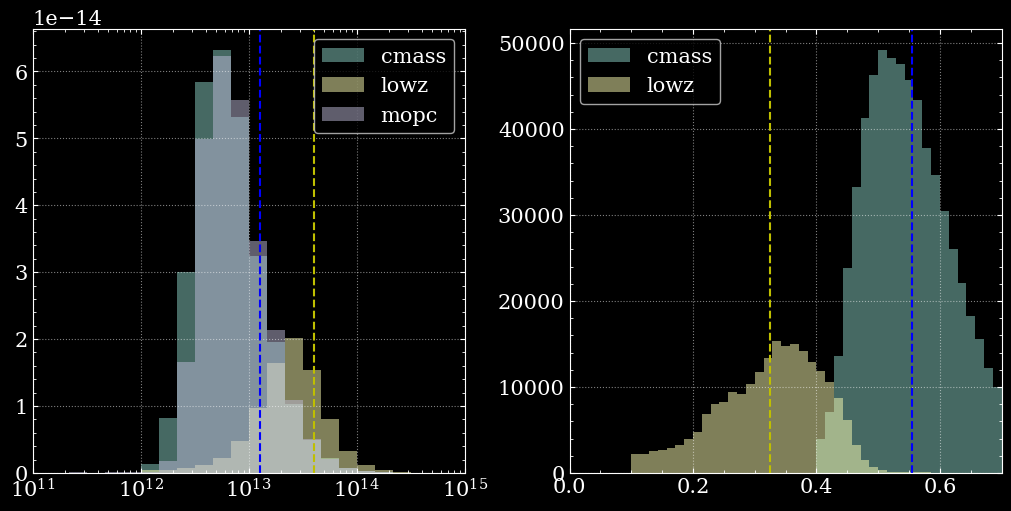

In [337]:
logms_cmass =dftestmara[(dftestmara["bits"].apply(lambda bits: (7 in bits))) &
                        (shmr.SHMR(dftestmara.LOGMASS)>12) & (dftestmara.Z>0.4)]
logms_lowz = dftestwisc[(dftestwisc["bits"].apply(lambda bits: (0 in bits))) & 
                        (shmr.SHMR(dftestwisc.MSTELLAR_MEDIAN)>12) & (dftestwisc.Z>0.1)]

fig, axs = plt.subplots(1, 2, figsize=(10, 5), layout='constrained')

axs[0].hist(10**shmr.SHMR(logms_cmass.LOGMASS), bins=np.logspace(11, 15, 25), label='cmass', alpha=0.5, density=True);
axs[0].hist(10**shmr.SHMR(logms_lowz.MSTELLAR_MEDIAN), bins=np.logspace(11, 15, 25), label='lowz', alpha=0.5, density=True);
axs[0].hist(10**mopc_logmhalos, bins=np.logspace(11, 15, 25), label='mopc', alpha=0.5, density=True);


axs[0].axvline(10**shmr.SHMR(logms_cmass.LOGMASS.mean()), ls='--', c='blue')
axs[0].axvline(10**shmr.SHMR(logms_lowz.MSTELLAR_MEDIAN.mean()), ls='--', c='y')

axs[0].set(xlim=(1e11, 1e15), xscale='log')
axs[0].legend()


axs[1].hist(logms_cmass.Z, bins=np.linspace(0, 0.7, 50), label='cmass', alpha=0.5);
axs[1].hist(logms_lowz.Z, bins=np.linspace(0, 0.7, 50), label='lowz', alpha=0.5);

axs[1].axvline(logms_cmass.Z.mean(), ls='--', c='blue')
axs[1].axvline(logms_lowz.Z.mean(), ls='--', c='y')

axs[1].set(xlim=(0, 0.7))
axs[1].legend()

In [343]:
mopc_logmhalos

array([12.88014519, 13.35407476, 12.86155857, ..., 12.84307884,
       12.73448927, 13.13065035])

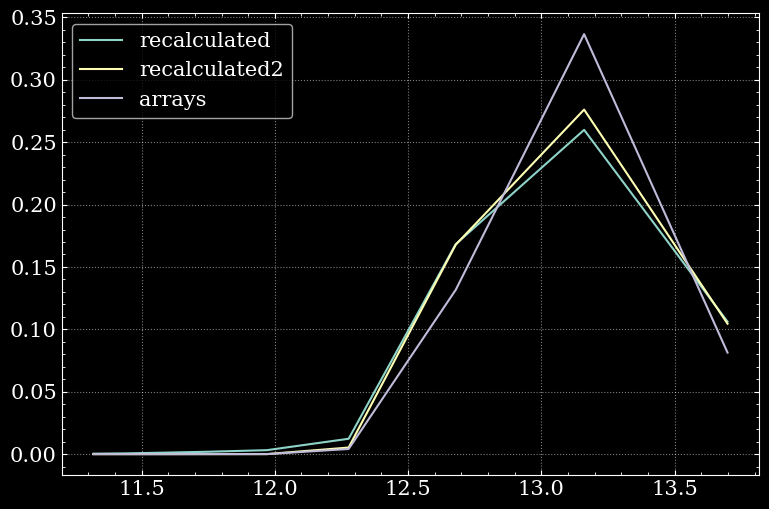

In [352]:
logms_cmass =dftestmara[(dftestmara["bits"].apply(lambda bits: (1 in bits)))]
h, b_edges = np.histogram(logms_cmass.LOGMASS, bins=np.linspace(9.42, 11.73, 10))
b_cen = np.array([(b_edges[i]+b_edges[i-1])*0.5 for i in range(1,len(b_edges))])
b_len = np.array([(b_edges[i]-b_edges[i-1]) for i in range(1,len(b_edges))])
integ = np.sum(10**b_len*h)
p = h/integ
plt.plot(shmr.SHMR(b_cen), p, label='recalculated')

h, b_edges = np.histogram(shmr.HSMR(mopc_logmhalos), bins=np.linspace(9.42, 11.73, 10))
b_cen = np.array([(b_edges[i]+b_edges[i-1])*0.5 for i in range(1,len(b_edges))])
b_len = np.array([(b_edges[i]-b_edges[i-1]) for i in range(1,len(b_edges))])
integ = np.sum(10**b_len*h)
p = h/integ
plt.plot(shmr.SHMR(b_cen), p, label='recalculated2')


plt.plot(mopc_logmhalo, mopc_N, label='arrays')
plt.legend()

In [10]:
p

array([1.04087299e-05, 1.01113376e-04, 3.47012185e-02, 1.54896770e-01,
       1.08353391e-01, 3.04157957e-02, 5.58502707e-03, 5.96271527e-04,
       2.52783440e-05])

In [5]:
np.mean(mopc_logmhalo)

13.142377092032541

In [223]:
import Models.SMFs as SMFs
del sys.modules['Models.SMFs']
import Models.SMFs as SMFs

In [235]:
cmass = SMFs.DR10CMASS({'group':'portsmouth', 'template':'passive', 'IMF':'krou'})

In [ ]:
np.sum(np.sum(cmass.N, axis=0)/np.sum(cmass.N)*cmass.logmstar)

array([1.01193829e-07, 3.82737001e-08, 2.42438412e-08, 1.90467149e-08,
       1.67808347e-08, 1.58430894e-08, 1.56449179e-08, 1.59286215e-08,
       1.65686106e-08, 1.75000472e-08, 1.86891563e-08])

In [ ]:
np.trapz(np.sum(cmass.dndlogm(**cpars)*cmass.volumes(**cpars)[:, ], axis=0), cmass.logmstar)

933157.500000001

In [231]:
cmass.logmstar

array([ 8.05,  8.15,  8.25,  8.35,  8.45,  8.55,  8.65,  8.75,  8.85,
        8.95,  9.05,  9.15,  9.25,  9.35,  9.45,  9.55,  9.65,  9.75,
        9.85,  9.95, 10.05, 10.15, 10.25, 10.35, 10.45, 10.55, 10.65,
       10.75, 10.85, 10.95, 11.05, 11.15, 11.25, 11.35, 11.45, 11.55,
       11.65, 11.75, 11.85, 11.95, 12.05, 12.15, 12.25, 12.35, 12.45,
       12.55, 12.65, 12.75, 12.85, 12.95, 13.05, 13.15, 13.25, 13.35,
       13.45, 13.55, 13.65, 13.75, 13.85, 13.95])

In [218]:
desi = SMFs.DESI1Percent({'zbin':'bin_4', 'sample':'LRG', 'hemisphere':'combined', 'zweight':'False'})

In [ ]:
cmass.addcuts(mstarmin=8)

In [221]:
np.sum(desi.N(**cpars))

17592.571984230664

In [208]:
cpars = {'hh':0.7,"T_CMB":2.7,"Omega_m":0.3,"Omega_b":0.05,"Omega_L":0.7}

In [245]:
np.genfromtxt("/global/homes/c/cpopik/Capybara/Data/cov_diskring_tsz_varweight_bootstrap.txt").shape

(9, 9)

(None, <matplotlib.legend.Legend at 0x7f7720146e00>)

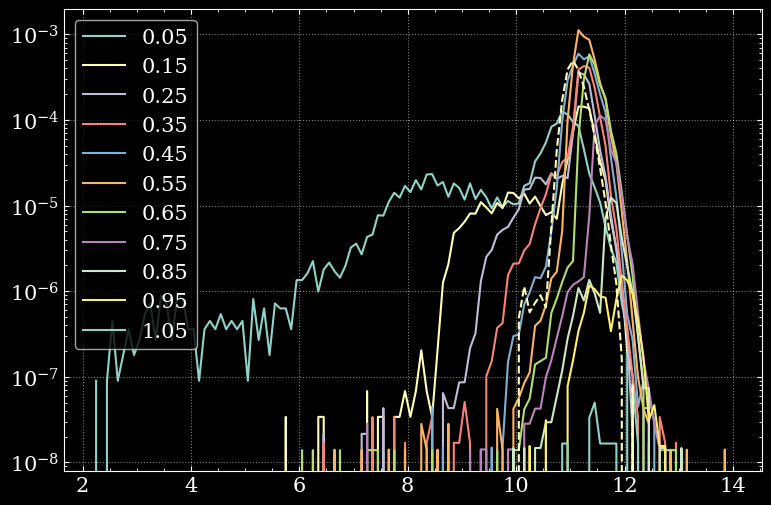

In [212]:
for i in range(cmass.z.size):
    plt.plot(cmass.logmstar, cmass.dndlogm(**cpars)[i], label=f'{cmass.z[i]:.2f}')

plt.plot(desi.logmstar, desi.dndlogmstar(**cpars)[4], ls='--')
plt.yscale('log'), plt.legend()

In [170]:
(cmass.area/4*np.pi*(180/np.pi)**2)

16432085.78967493

In [86]:
(2*np.pi*u.sr).to(u.deg**2)

<Quantity 20626.48062471 deg2>

In [83]:
np.sum(smf.n_to_N(0.7, 2.7, 0.3, 0.7, 0.05)[:, None]*smf.dndlogmstar)*0.7**3

5183897.788164904

In [39]:
pd.read_csv(f"{smf.path}/Fig1_{smf.sample}_z0.8.txt", sep=' ', names=['Mstar',f"n", f"err"], usecols=[0]).Mstar.values

array([ 7.05,  7.15,  7.25,  7.35,  7.45,  7.55,  7.65,  7.75,  7.85,
        7.95,  8.05,  8.15,  8.25,  8.35,  8.45,  8.55,  8.65,  8.75,
        8.85,  8.95,  9.05,  9.15,  9.25,  9.35,  9.45,  9.55,  9.65,
        9.75,  9.85,  9.95, 10.05, 10.15, 10.25, 10.35, 10.45, 10.55,
       10.65, 10.75, 10.85, 10.95, 11.05, 11.15, 11.25, 11.35, 11.45,
       11.55, 11.65, 11.75, 11.85, 11.95, 12.05, 12.15, 12.25, 12.35,
       12.45, 12.55, 12.65, 12.75, 12.85, 12.95])

In [32]:
np.trapz(smf.dndlogmstar, smf.logmsstar)

ValueError: operands could not be broadcast together with shapes (1,58) (6,59) 